In [14]:
using DataFrames
using Pkg
using JET
using CSV
using Statistics
using Plots

In [15]:
train_df = CSV.read("train.csv", DataFrame)
describe(train_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


In [16]:
## Handeling missing data
describe(train_df)
#* get the last row in the dataframe
# println(train_df[end-10 : end-5, :Age]) #* end retrieves the last row
# filtered =  dropmissing(train_df[1:150, :], :Age) #* @view is used to get the last row
#* drop the rows with missing data in the Embarked
train_df = dropmissing(train_df, :Embarked)

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [17]:
#* handel the missing data in the Age column
median_age = median(skipmissing(train_df[:, :Age]))
println("the median age : ", median_age)
train_df.Age = replace(train_df.Age, missing => median_age)
describe(train_df)

the median age : 28.0


Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.382452,0,0.0,1,0,Int64
3,Pclass,2.31159,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.3152,0.42,28.0,80.0,0,Float64
7,SibSp,0.524184,0,0.0,8,0,Int64
8,Parch,0.382452,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


In [18]:
#* Handeling Cabin missing data
length(train_df.Cabin)
describe(train_df)[11, :].nmissing
missing_ratio = describe(train_df)[11, :].nmissing / length(train_df.Cabin) * 100

#* it's around 77% of the data is missing in the Cabin column
#* so we will drop it
train_df = select(train_df, Not(:Cabin))


Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,Int64,Int64,Int64,String,String7,Float64,Int64,Int64,String31,Float64,String1
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S
6,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


In [19]:
## Non-numeric data Handeling
#* print the string columns names
train_df
#* passenger id is not important, unique for each passenger
#* name is not important, unique for each passenger

length(unique(train_df.Ticket))
#* ticket is not important, 680 unique values

train_df = select(train_df, Not(:PassengerId, :Name, :Ticket))
describe(train_df)


train_df
#* Sex, Ticket, Embarked

combine(groupby(train_df, "Embarked"), nrow => "counts")
#* replace S =>1, C=>2, Q=>3
#* convert it to int64
train_df.Embarked = Int64.(replace(train_df.Embarked, "S" => 1, "C" => 2, "Q" => 3))
train_df

train_df.Sex = Int64.(replace(train_df.Sex, "male" => 1, "female" => 2))
describe(train_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Survived,0.382452,0,0.0,1,0,Int64
2,Pclass,2.31159,1,3.0,3,0,Int64
3,Sex,1.35096,1,1.0,2,0,Int64
4,Age,29.3152,0.42,28.0,80.0,0,Float64
5,SibSp,0.524184,0,0.0,8,0,Int64
6,Parch,0.382452,0,0.0,6,0,Int64
7,Fare,32.0967,0.0,14.4542,512.329,0,Float64
8,Embarked,1.3622,1,1.0,3,0,Int64


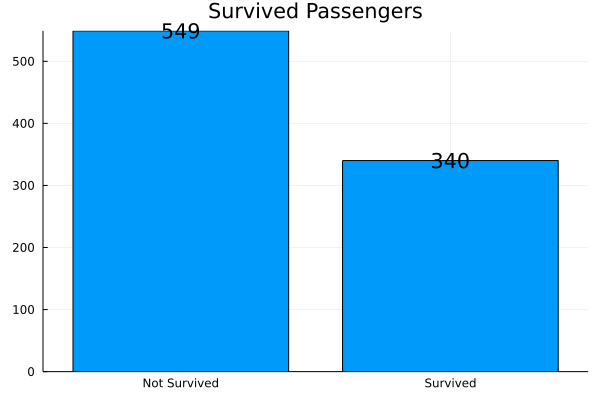

In [20]:
using Plots

# Group dataset by "Survived" column
survived = combine(groupby(train_df, "Survived"), nrow => "Count")

# Display the data on bar chart
plot(survived.Survived, survived.Count, title="Survived Passengers",
    label=nothing, seriestype="bar", texts=survived.Count)

# Modify X axis to display text labels instead of numbers
xticks!([0:1:1;], ["Not Survived", "Survived"])

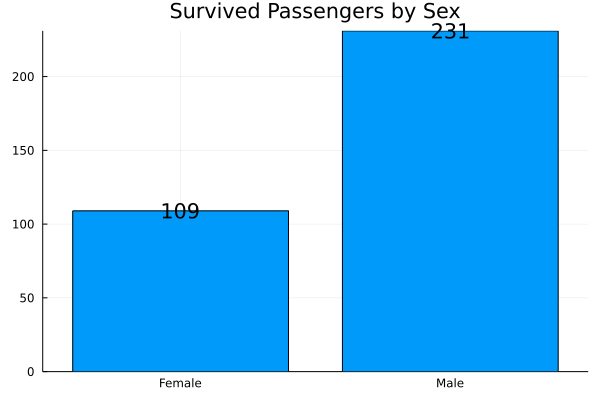

In [21]:
# Group dataset by Sex column and show only rows where Survived=1
survived_by_sex = combine(groupby(train_df[train_df.Survived .== 1,:],"Sex"), nrow => "Count")

# Display the data on bar chart 
plot(survived_by_sex.Sex, survived_by_sex.Count, title="Survived Passengers by Sex", label=nothing, seriestype="bar", texts=survived_by_sex.Count)

# Modify X axis to display text labels instead of numbers
# xticks!([1:1:2;], ["Not Survived", "Survived"])
xticks!([1:1:2;],["Female","Male"])

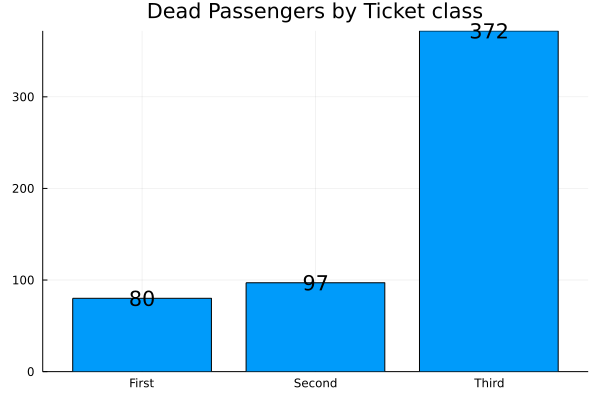

In [22]:
# Group dataset by PClass column and show only rows where Survived=0
death_by_pclass = combine(groupby(train_df[train_df.Survived .== 0,:],"Pclass"), nrow => "Count")

# Display the data on bar chart 
plot(death_by_pclass.Pclass, death_by_pclass.Count, title="Dead Passengers by Ticket class", label=nothing, 
    seriestype="bar", texts=death_by_pclass.Count)

# Modify X axis to display text labels instead of numbers
xticks!([1:1:3;],["First","Second","Third"])